# Day 9 – Session 1: AI for Robotic Decision-Making

In this lecture, we compare rule-based vs ML-based decision-making. For example, a rule-based system might decide `“if hue<30 and area>400 then bin 0, else bin 1.”` A machine learning (ML) classifier would learn a decision boundary from data (e.g. logistic regression on hue and size). We generate a synthetic dataset consistent with our earlier vision outputs (hue and object size).

We also introduce trajectory optimization and potential fields conceptually. Trajectory optimization finds paths by minimizing cost (e.g. energy or time), and potential fields treat goals as attractive forces and obstacles as repulsive (an idea from Khatib’s 1986 work).


In [ ]:
!pip install numpy matplotlib scikit-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Generate synthetic dataset: features = (hue, area), labels = bin (0 or 1)
np.random.seed(0)
hues = np.concatenate([np.random.normal(5, 2, 50), np.random.normal(120, 5, 50)])
areas = np.concatenate([np.random.normal(500, 50, 50), np.random.normal(300, 80, 50)])
labels = np.array([0]*50 + [1]*50)
data = np.stack([hues, areas], axis=1)
print("Sample data (hue, area):\n", np.round(data[:5],1), "Labels:", labels[:5])

Sample data (hue, area):
 [[  8.5 594.2]
 [  5.8 432.6]
 [  7.  436.5]
 [  9.5 548.5]
 [  8.7 441.3]] Labels: [0 0 0 0 0]


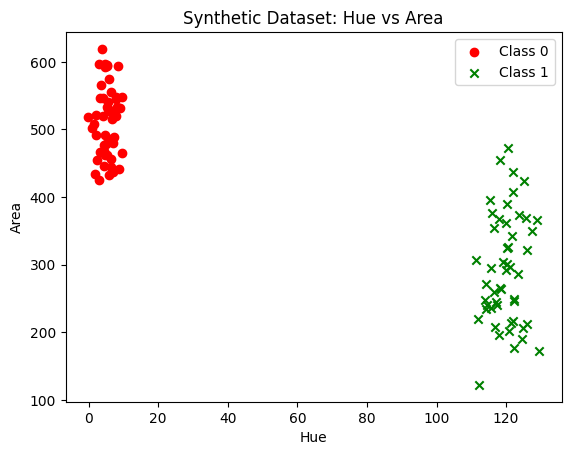

In [ ]:
# Visualize the data
plt.scatter(data[:50,0], data[:50,1], c='red', marker='o', label='Class 0')
plt.scatter(data[50:,0], data[50:,1], c='green', marker='x', label='Class 1')
plt.xlabel('Hue')
plt.ylabel('Area')
plt.title('Synthetic Dataset: Hue vs Area')
plt.legend()
plt.show()

In [ ]:
# Rule-based classifier
def rule_classifier(hue, area):
    return 0 if (hue < 30 and area > 400) else 1

y_pred_rule = np.array([rule_classifier(h, a) for h, a in data])
print("Rule-based accuracy:", accuracy_score(labels, y_pred_rule))

Rule-based accuracy: 1.0


## Logistic Regression Classifier

In [ ]:
clf = LogisticRegression().fit(data, labels)
y_pred_ml = clf.predict(data)
print("ML-based (Logistic) accuracy:", accuracy_score(labels, y_pred_ml))
print("Logistic coeffs:", np.round(clf.coef_,3), "intercept:", np.round(clf.intercept_,3))

ML-based (Logistic) accuracy: 1.0
Logistic coeffs: [[ 0.159 -0.023]] intercept: [0.]


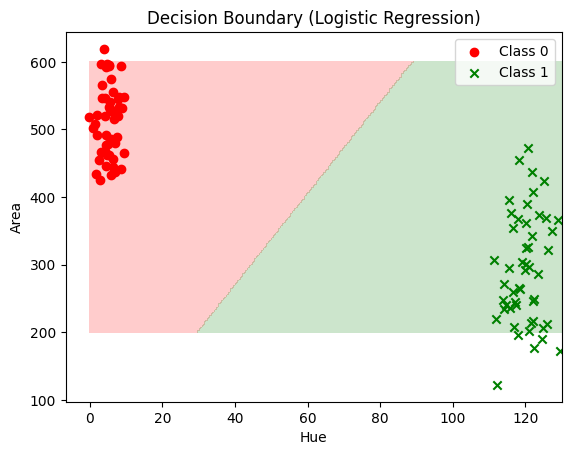

In [ ]:
# Plot logistic decision boundary
xx, yy = np.meshgrid(np.linspace(0, 130, 200), np.linspace(200, 600, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, levels=[-0.5,0.5,1.5], colors=['red','green'])
plt.scatter(data[:50,0], data[:50,1], c='red', marker='o', label='Class 0')
plt.scatter(data[50:,0], data[50:,1], c='green', marker='x', label='Class 1')
plt.xlabel('Hue'); plt.ylabel('Area')
plt.title('Decision Boundary (Logistic Regression)')
plt.legend()
plt.show()

In [ ]:
# Compare rule vs ML predictions
print("First 5 samples: Data (hue,area)")
for i in range(5):
    print(f"{data[i]} -> Rule: {y_pred_rule[i]}, ML: {y_pred_ml[i]}, True: {labels[i]}")

First 5 samples: Data (hue,area)
[  8.52810469 594.15753485] -> Rule: 0, ML: 0, True: 0
[  5.80031442 432.61204694] -> Rule: 0, ML: 0, True: 0
[  6.95747597 436.47575008] -> Rule: 0, ML: 0, True: 0
[  9.4817864  548.46983541] -> Rule: 0, ML: 0, True: 0
[  8.73511598 441.34382974] -> Rule: 0, ML: 0, True: 0


**🧠 Think & Discuss**

1. Rule vs. ML:
   - When does a hand‑written rule break down?  
   - What happens if object hue drifts to 30–35 deg because of lighting?  

2. Overfitting Demo:
   - Modify the Decision Tree depth (e.g., `max_depth=1…5`).  
   - Plot accuracy on training vs. a noisy test set.  
   - *At what depth does the model start to “memorize” instead of generalize?*  

3. History Corner (Mentor‑led):
   - Briefly trace: Artificial Potential Fields → Velocity Obstacles (RVO) → ORCA → Reinforcement Learning planners.  
   - *Which of these handle dynamic obstacles best? Why?*


## Decision Tree Classifier

In [ ]:
tree = DecisionTreeClassifier().fit(data, labels)
y_pred_tree = tree.predict(data)
print("Decision Tree accuracy:", accuracy_score(labels, y_pred_tree))
print("Decision Tree predictions (first 5):", y_pred_tree[:5])

Decision Tree accuracy: 1.0
Decision Tree predictions (first 5): [0 0 0 0 0]


In [ ]:
# Confusion matrices for rule-based vs ML
print("Confusion (rule):\n", confusion_matrix(labels, y_pred_rule))
print("Confusion (ML):\n", confusion_matrix(labels, y_pred_ml))

Confusion (rule):
 [[50  0]
 [ 0 50]]
Confusion (ML):
 [[50  0]
 [ 0 50]]


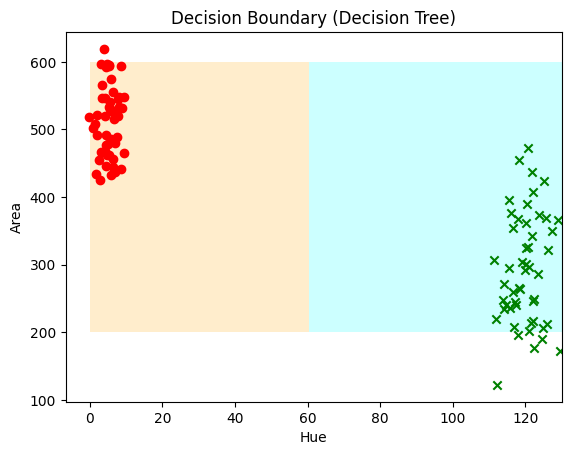

In [ ]:
# Plot decision boundary for decision tree
Zt = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Zt, alpha=0.2, levels=[-0.5,0.5,1.5], colors=['orange','cyan'])
plt.scatter(data[:50,0], data[:50,1], c='red', marker='o')
plt.scatter(data[50:,0], data[50:,1], c='green', marker='x')
plt.xlabel('Hue'); plt.ylabel('Area')
plt.title('Decision Boundary (Decision Tree)')
plt.show()

## Neural Network Classifier (Optional)

In [ ]:
nn = MLPClassifier(max_iter=500).fit(data, labels)
print("Neural Net accuracy:", accuracy_score(labels, nn.predict(data)))

Neural Net accuracy: 1.0


In [ ]:
# Predict on new samples
test_points = np.array([[10, 450], [100, 350]])
print("Test points:", test_points)
print("Rule predictions:", [rule_classifier(h,a) for h,a in test_points])
print("ML predictions:", nn.predict(test_points))

Test points: [[ 10 450]
 [100 350]]
Rule predictions: [0, 1]
ML predictions: [0 1]


In [ ]:
# (Conceptual) Potential field example (goal at origin, obstacle at (1,1))
def potential_field(point):
    goal = np.array([0.0, 0.0])
    obstacle = np.array([1.0, 1.0])
    att = np.linalg.norm(point-goal)**2
    rep = 1.0 / (np.linalg.norm(point-obstacle) + 1e-5)
    return att + rep

points = [np.array([x,y]) for x in [0.5, 0.0] for y in [0.5, 0.0]]
for pnt in points:
    print(f"Potential at {pnt}:", np.round(potential_field(pnt),3))

Potential at [0.5 0.5]: 1.914
Potential at [0.5 0. ]: 1.144
Potential at [0.  0.5]: 1.144
Potential at [0. 0.]: 0.707
